In [12]:
#Loading necessary libraries
library(reshape2)
library(ggplot2)
library(corrplot)
library(datasets)

In [3]:
### Question 3 I

# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

In [5]:
#Defining the knn function
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    mean.value <-vector()
    
      ## count number of train samples
    train.len <- nrow(train.data)
    
      ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between sample
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    
    for (i in 1:test.len){
    
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### taking the mean value of label as predicted
        mean.value[i] <- sum(train.label[nn])/K
    }
    return (mean.value)
}

In [6]:
#defining the rmse function
rmse <- function(initial, predicted) {
    
  #calculating the rmse value  
  RMSE <- (sum((predicted - initial)**2) /length(initial))**0.5 
    
  return (RMSE)
}

In [16]:
## Question 3 II

#Reading the required data
trainB = read.csv("assignment1_datasets/Task1B_train.csv")
testB=read.csv("assignment1_datasets/Task1B_test.csv")

#assigning train data to a seperate variable
train.data <- trainB[, -5]

#assigning train label values to a seperate variable
train.label <- trainB[, 5]

#assigning test data to a seperate variable
test.data <- testB[, -5]

#assigning test label values to a seperate variable
test.label <- testB[, 5]

In [7]:
set.seed(32350260)
# fix the parameters (50,40,50)
K <- 15           # Maximum K for KNN 
L <- 50          # number of datasets
N <- 60          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <- rmse(knn(train.data[indx, ], train.label[indx], test.data, K=k), train.label)
        
    } 
}

In [13]:
miss_plot = melt(miss,id=c('K','L'))
names(miss_plot) <- c('K', 'L', 'type', 'test_error')
miss_plot

K,L,type,test_error
1,1,test,120.7976
1,2,test,143.0692
1,3,test,130.8395
1,4,test,104.8139
1,5,test,146.3114
1,6,test,150.6557
1,7,test,128.4064
1,8,test,123.4680
1,9,test,117.2200
1,10,test,129.0507


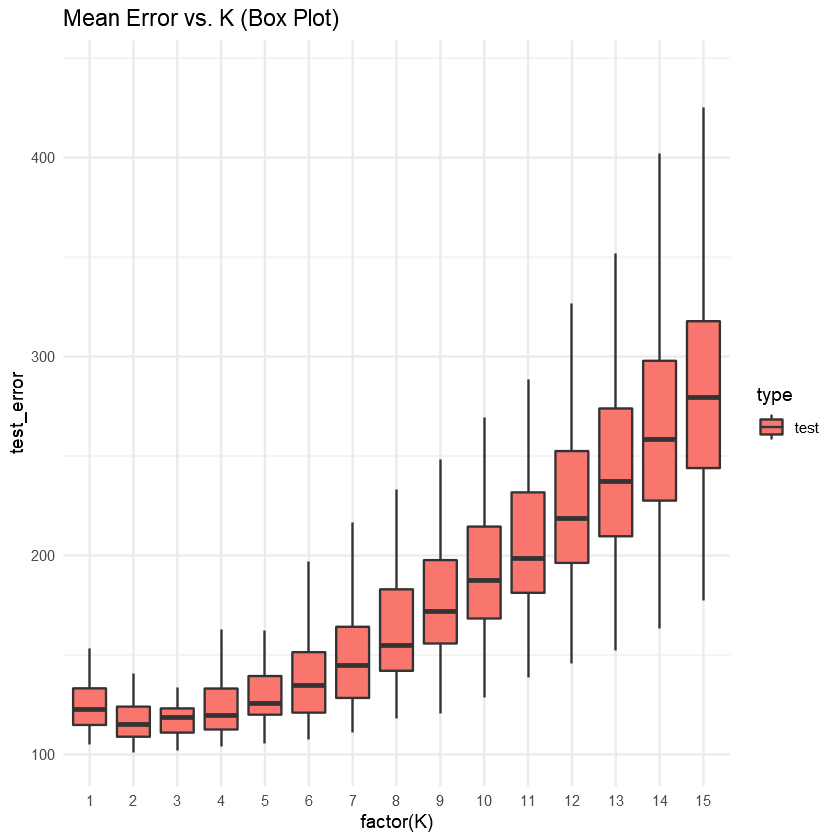

In [15]:
##Creating a boxplot where the x-axis is K, and the y-axis is the average test error corresponding to each K.
ggplot(data=miss_plot[miss_plot$type=='test',], aes(factor(K), test_error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
scale_color_discrete(guide = guide_legend(title = NULL)) + ggtitle('Mean Error vs. K (Box Plot)') + theme_minimal()

In [103]:
set.seed(032350260)
# fix the parameters
K <- 10           # Maximum K for KNN 
L <- seq(10,200,10) # sequence of datasets
N <- 40          # size of datasets


# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('Times'=(1:20)*10, 'N'=1:N,'test'= rep(0,K*20))

## for every L values:
     for (i in L){
      boot.indx <- boot(dim(train.data)[1], i,N)
        #For every N value
        for (j in 1:N){
            
            #defining the index values
            ind <- (i/10-1)*N+j
            
            #### save sample indices that were selected by bootstrap
            indx <- boot.indx[j,]
            
            #### save the value of L and N
            miss[ind,1] <- i
            miss[ind,2] <- j
            
            #### calculate and record the train and test missclassification rates
            miss[ind,3] <- rmse(knn(train.data[indx,],train.label[indx],test.data,K=K),test.label)
        }
        
        } 
 

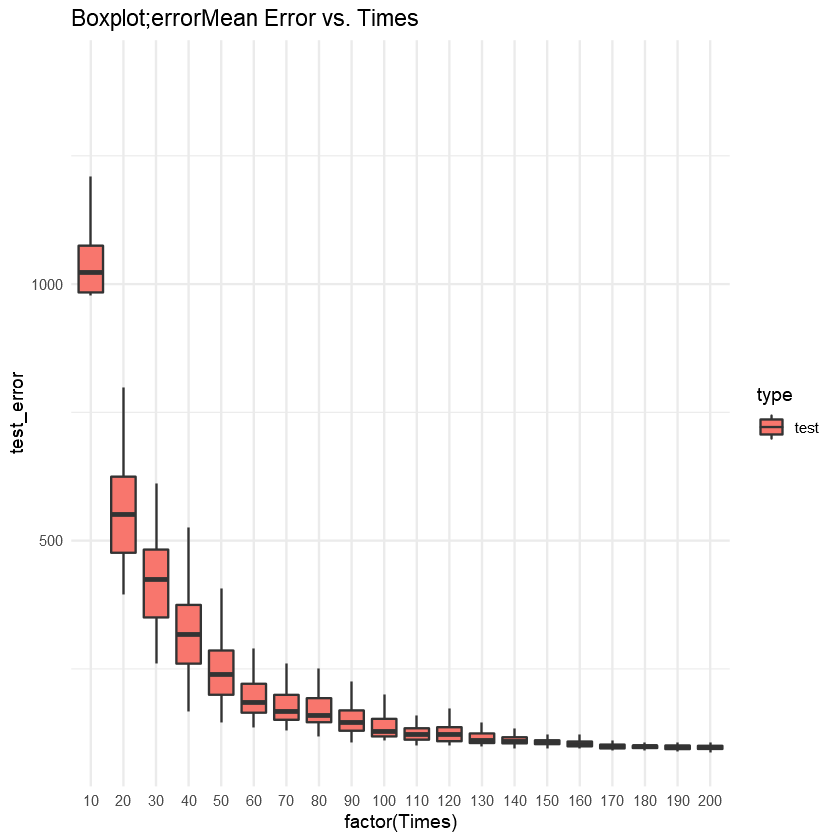

In [105]:
#melting the dataframe to plot
miss_plot1 = melt(miss,id=c('Times','N'))

#Renaming the columns
names(miss_plot1) <- c('Times', 'N', 'type', 'test_error')

#miss_plot
ggplot(data=miss_plot1[miss_plot1$type=='test',], aes(factor(Times), test_error,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Boxplot;errorMean Error vs. Times') + theme_minimal()
